<a href="https://colab.research.google.com/github/mnida/basic-ml-implementations/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Motivation is to practice building deep learning algorithms from scratch

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

In [55]:
np.random.seed(42)
X = np.random.randn(200,2)
y = np.where(X[:, 0] > X[:, 1], 1, -1)
y = y.ravel() # or y = y.squeeze()
y.shape

(200,)

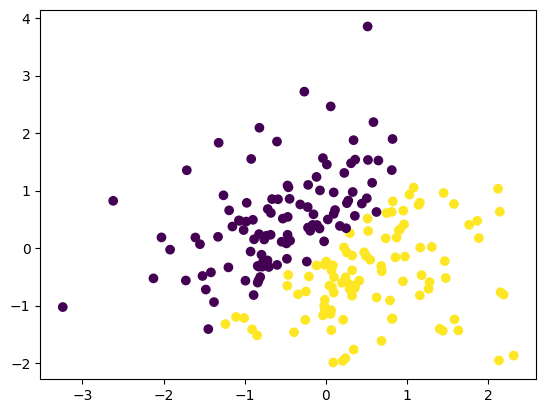

In [50]:
scatterplot = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [57]:
class SVM:
  def __init__(self, learning_rate=0.001, iterations=10000, alpha=0.1, gamma=1.0, kernel = 'linear'):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.alpha = alpha
    self.gamma = gamma

    self.w = None
    self.b = 0
    self.kernel = kernel

  def kernel_func(self, X1, X2):
    if self.kernel == 'linear':
      return np.dot(X1,X2)
    else:
      return np.exp(-self.gamma * np.sum((X1[:, np.newaxis] - X2) ** 2, axis=2))



  def fit(self, X, labels) -> None:
    n_features = X[1].shape
    n_points = X[0].shape

    self.w = np.zeros(n_features)


    for _ in range(self.iterations):

      # (n,points*n_features) *(n_features,)
      preds = self.kernel_func(X, self.w) + self.b

      misclassified = labels * preds < 1
      print(misclassified.shape)

      grad = self.alpha * self.w - np.dot(X[misclassified].T, labels[misclassified]) # derivative


      self.w = self.w- self.learning_rate*grad

      bias_grad = -np.sum(labels[misclassified])

      self.b = self.b - self.learning_rate* bias_grad


  def predict(self, X):
    preds = np.dot(X, self.w) + self.b
    return np.sign(preds)



In [ ]:
model = SVM(kernel='rbf')

model.fit(X,y)

In [28]:
# Make predictions
X_test = np.random.randn(100, 2)
y_test = np.where(X_test[:, 0] > X_test[:, 1], 1, -1)

preds = model.predict(X_test)

accuracy = np.mean(preds == y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


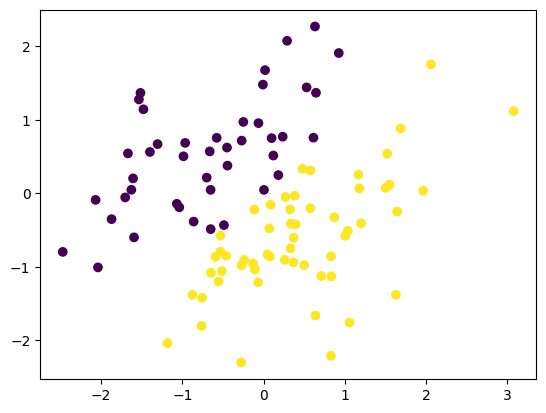

In [29]:
# Display boundary
scatterplot = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [36]:
x1_min, x1_max = np.min(np.concatenate((X[:, 0], X_test[:, 0]))) - 1, np.max(np.concatenate((X[:, 0], X_test[:, 0]))) + 1
x2_min, x2_max = np.min(np.concatenate((X[:, 1], X_test[:, 1]))) - 1, np.max(np.concatenate((X[:, 1], X_test[:, 1]))) + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig = go.Figure()

fig.add_trace(go.Contour(
    x=xx1[0], y=xx2[:,0], z=Z,
    colorscale='RdBu', showscale=False,
    opacity=0.3, connectgaps=True,
    contours=dict(start=-1, end=1, size=0.2, coloring='fill')
))

fig.add_trace(go.Scatter(
    x=X[:, 0], y=X[:, 1], mode='markers',
    marker=dict(size=10, color=y, colorscale='mint', opacity=0.6),
    name='Training Data'
))

fig.add_trace(go.Scatter(
    x=X_test[:, 0], y=X_test[:, 1], mode='markers',
    marker=dict(size=10, color=y_test, colorscale='viridis'),
    name='Test Data'
))

fig.update_layout(
    title='SVM Decision Boundary',
    xaxis_title='Feature 1',
    yaxis_title='Feature 2',
    legend=dict(x=0.8, y=0.9),
    width=800, height=600
)

fig.show()